In [1]:
%load_ext wurlitzer
import glob
import os
from xspec import *
from stingray import Lightcurve
from astropy.io import fits
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12,8]
os.chdir('pps/')

Fit.statMethod = "chi"
Fit.nIterations = 100000
Fit.delta = 1e-4
Fit.criticalDelta = 1e-4


1 spectrum  in use
 
Spectral Data File: P0886040201PNS003SRSPEC0001.FTZ  Spectrum 1
Net count rate (cts/s) for Spectrum:1  1.019e-02 +/- 1.153e-03 (43.0 % total)
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-21
  Telescope: XMM Instrument: EPN  Channel Type: PI
  Exposure Time: 1.808e+04 sec
 Using fit statistic: chi
 Using Background File                P0886040201PNS003BGSPEC0001.FTZ
  Background Exposure Time: 1.808e+04 sec
 Using Response (RMF) File            epn_e3_ff20_sdY8.rmf for Source 1
 Using Auxiliary Response (ARF) File  P0886040201PNS003SRCARF0001.FTZ



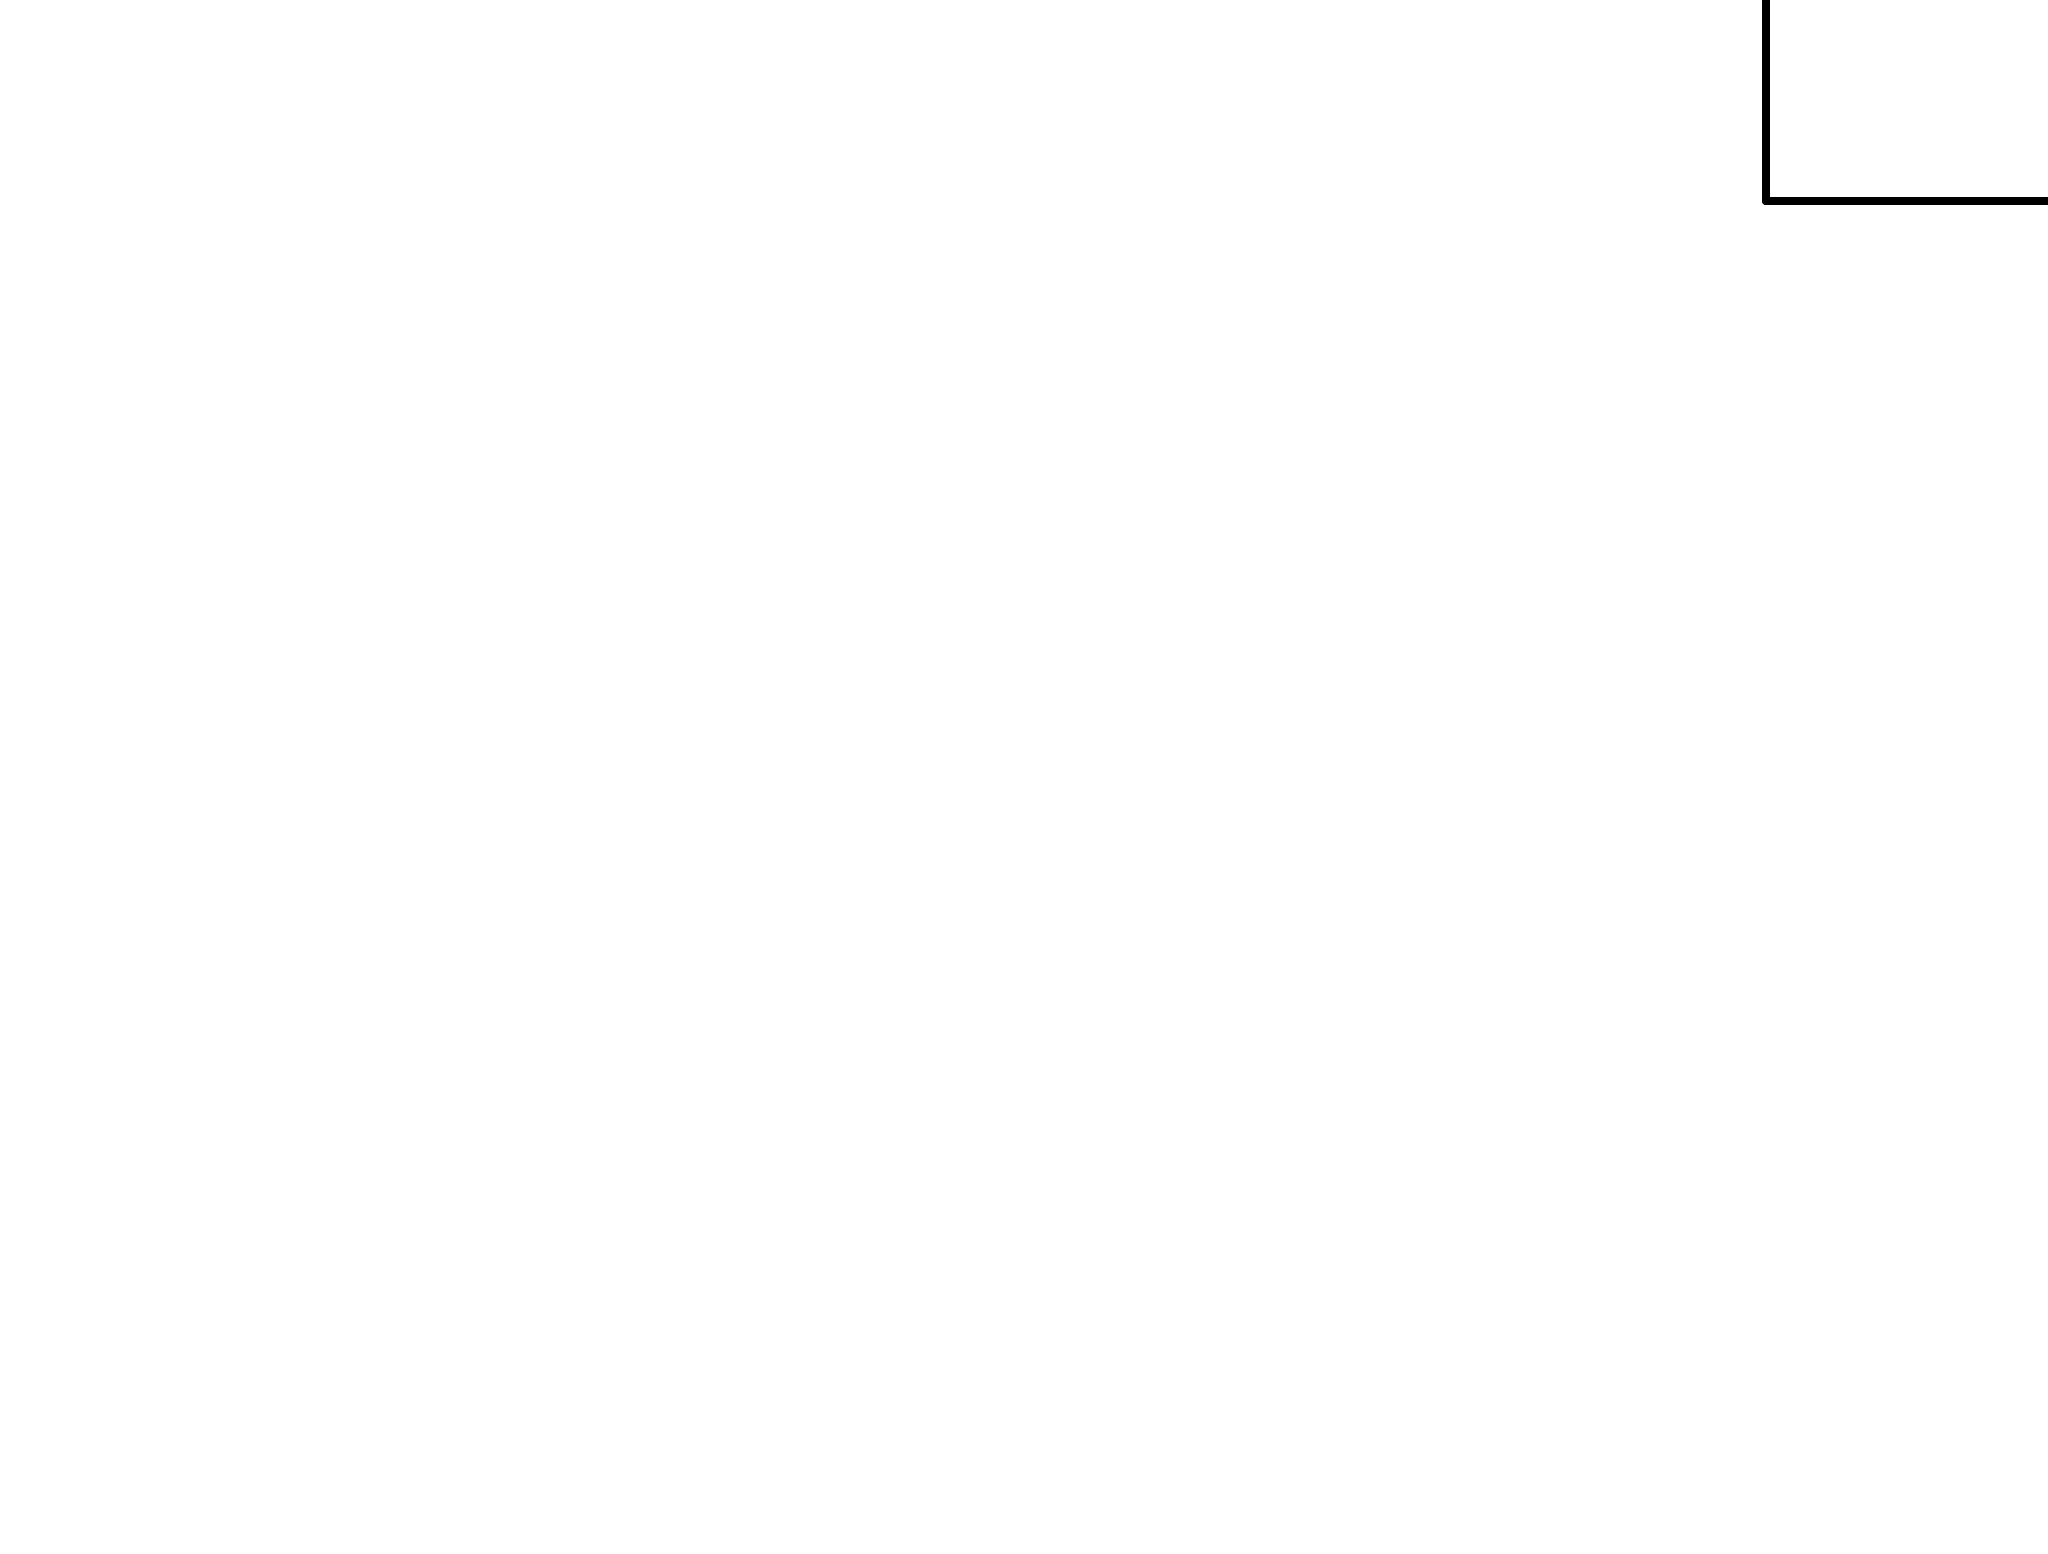

In [2]:
spec_fnames = glob.glob('P*PNS*SRSPEC*.FTZ')

spec = Spectrum(spec_fnames[0])
Plot.device="/svg"
Plot.xAxis="keV"
Plot.xLog=True
Plot.yLog=True
Plot.addCommand("Rescale Y 0.00001 0.01")
Plot("data")

      No channels ignored (no channels in specified range)
     1 channels (21) ignored in spectrum #     1


Model TBabs<1>*bbody<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
________________________________________________________________________

tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE NOTICE:
To get the model described by the above paper
you will also have to set the abundances:
   abund wilm

Note that this routine ignores the current cross s

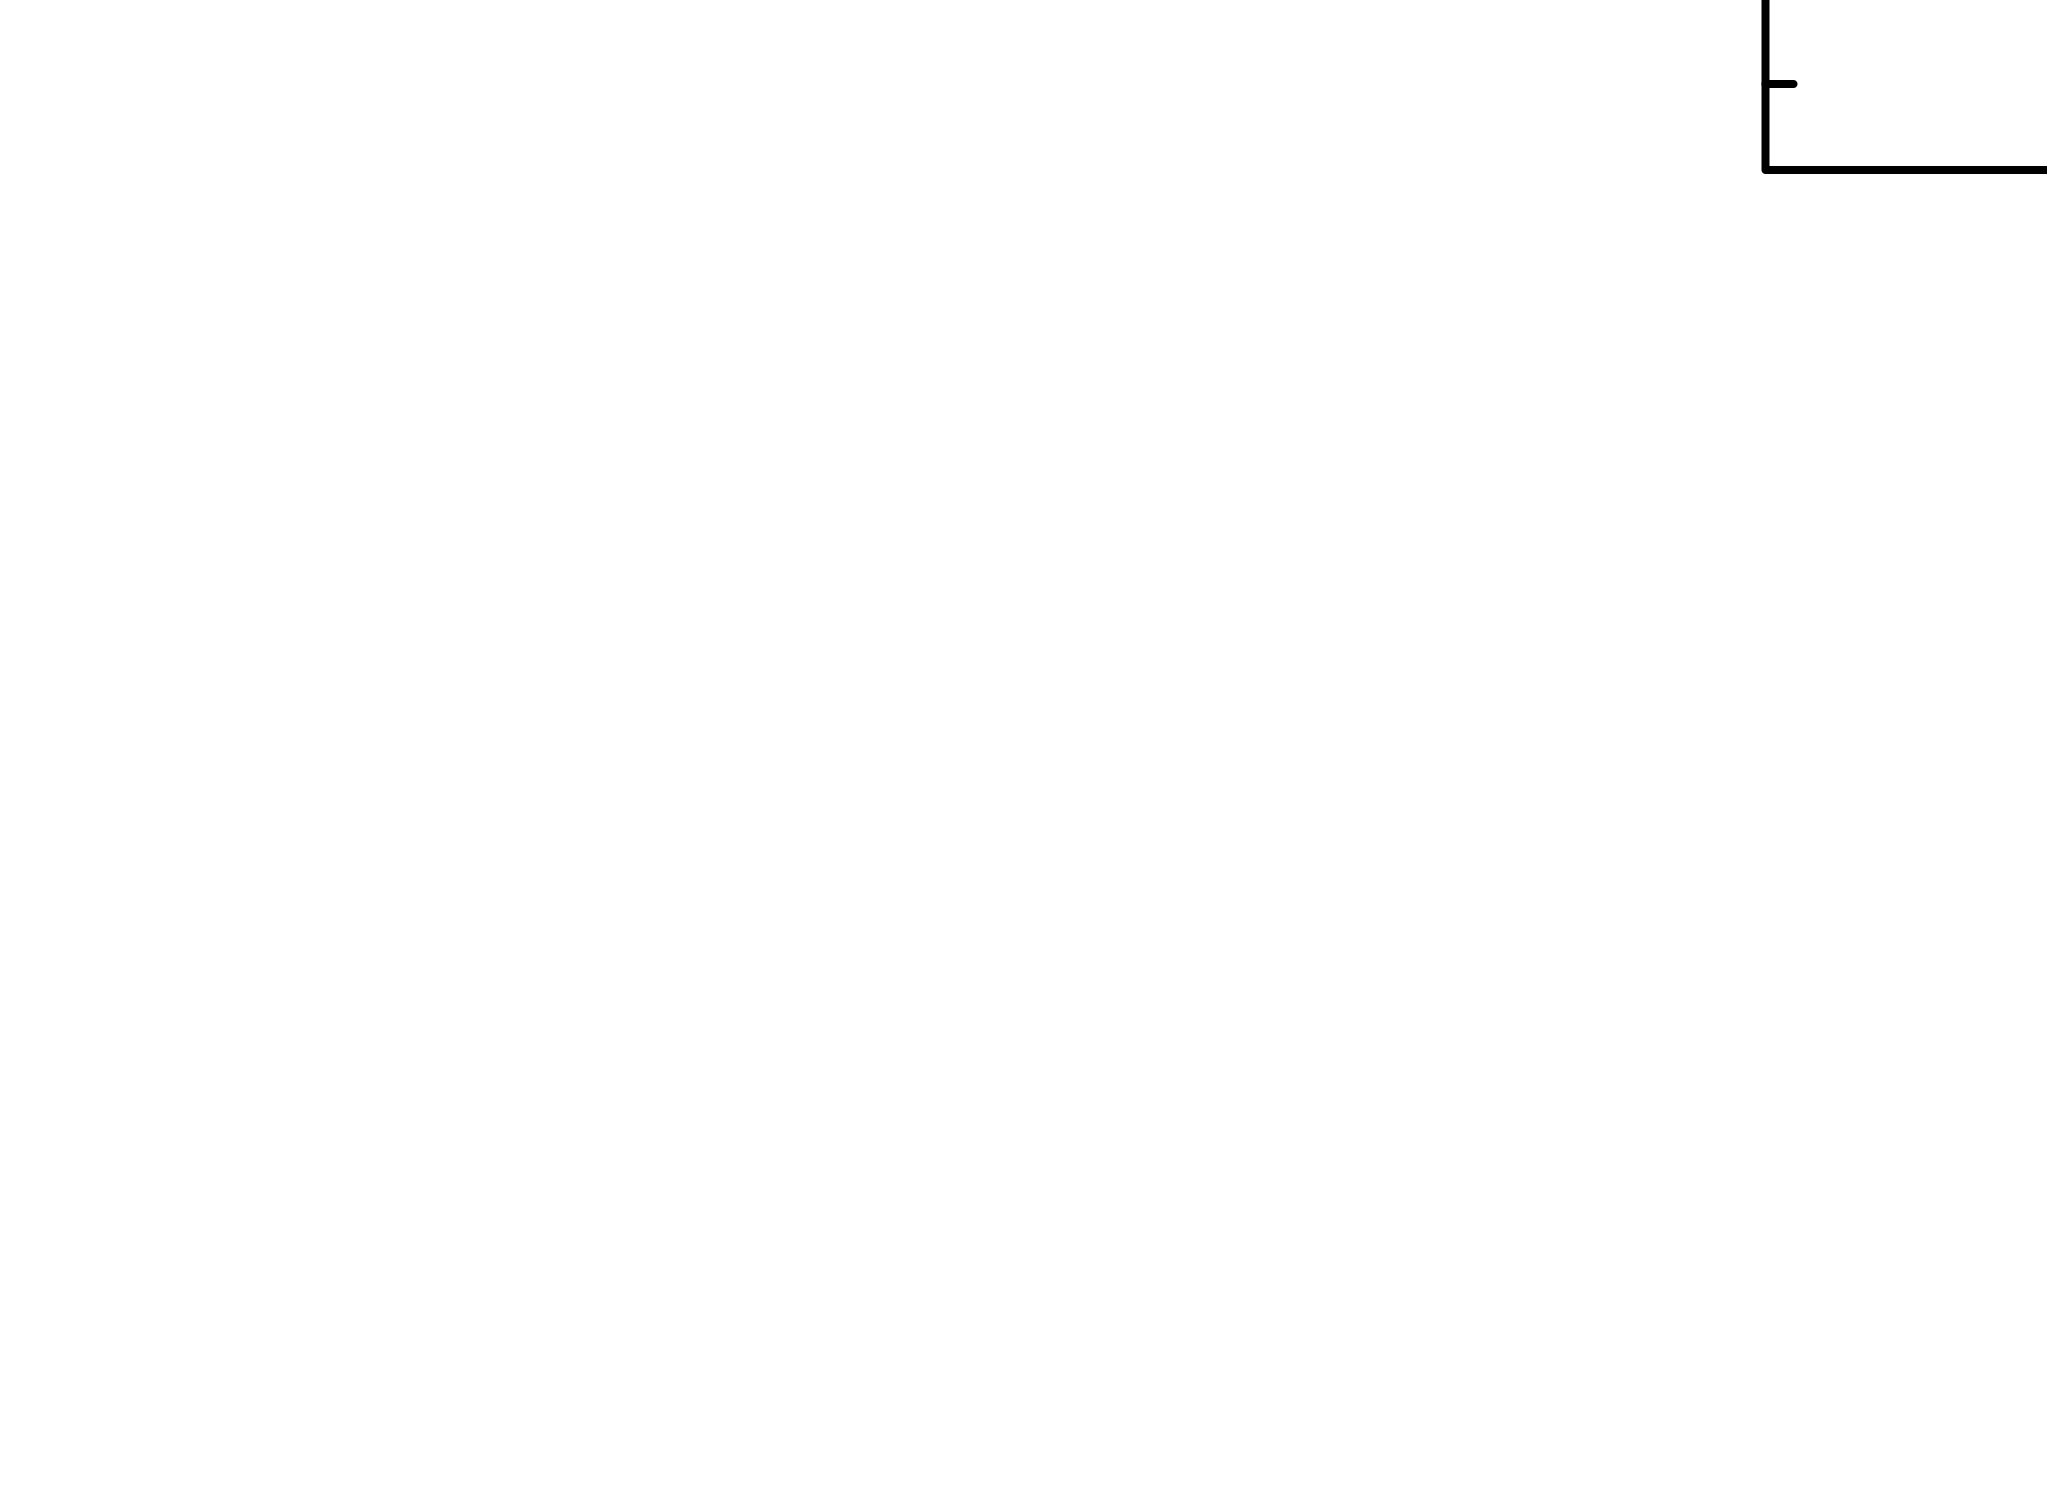

ection setting
as it always HAS to use the Verner cross sections as a baseline.

Fit statistic  : Chi-Squared              1.091365e+12     using 20 bins.

Test statistic : Chi-Squared              1.091365e+12     using 20 bins.
 Null hypothesis probability of 0.000000e+00 with 17 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        3:norm
73.7024      1.27952       0      0.241046       3.12218   3.81645e-06
70.633       513786        0      0.111668       2.98135   3.66756e-06
69.5338      579714       -1     0.0415895       2.38548   1.94618e-06
36.8293      1.69767e+06  -1     0.0205708       1.08657   1.01314e-06
22.8         5.4552e+06   -2    0.00977858      0.725058   1.06926e-06
20.6829      3.10468e+06  -3     0.0754931      0.713964   1.04701e-06
20.5641      228038       -4      0.108423      0.695773   1.04921e-06
20.5501      6281.39      -5      0.117276     

In [3]:
spec.ignore("**-0.2 12.0-**")
mo = Model("tbabs*bbody")
Fit.perform()
Plot("data resid")


Model TBabs<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   3    2   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              2.217030e+11     using 20 bins.

Test statistic : Chi-Squared              2.217030e+11     using 20 bins.
 Null hypothesis probability of 0.000000e+00 with 17 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH    2:PhoIndex        3:norm
38.7304      6.40125      -3      0.223905      0.664832   6.84191e-06
33.4805      610393       -4      0.488664       2.08068   2.05559e-05
16.1187      339622       -5      0.641327       2.10897   4.18522e-0

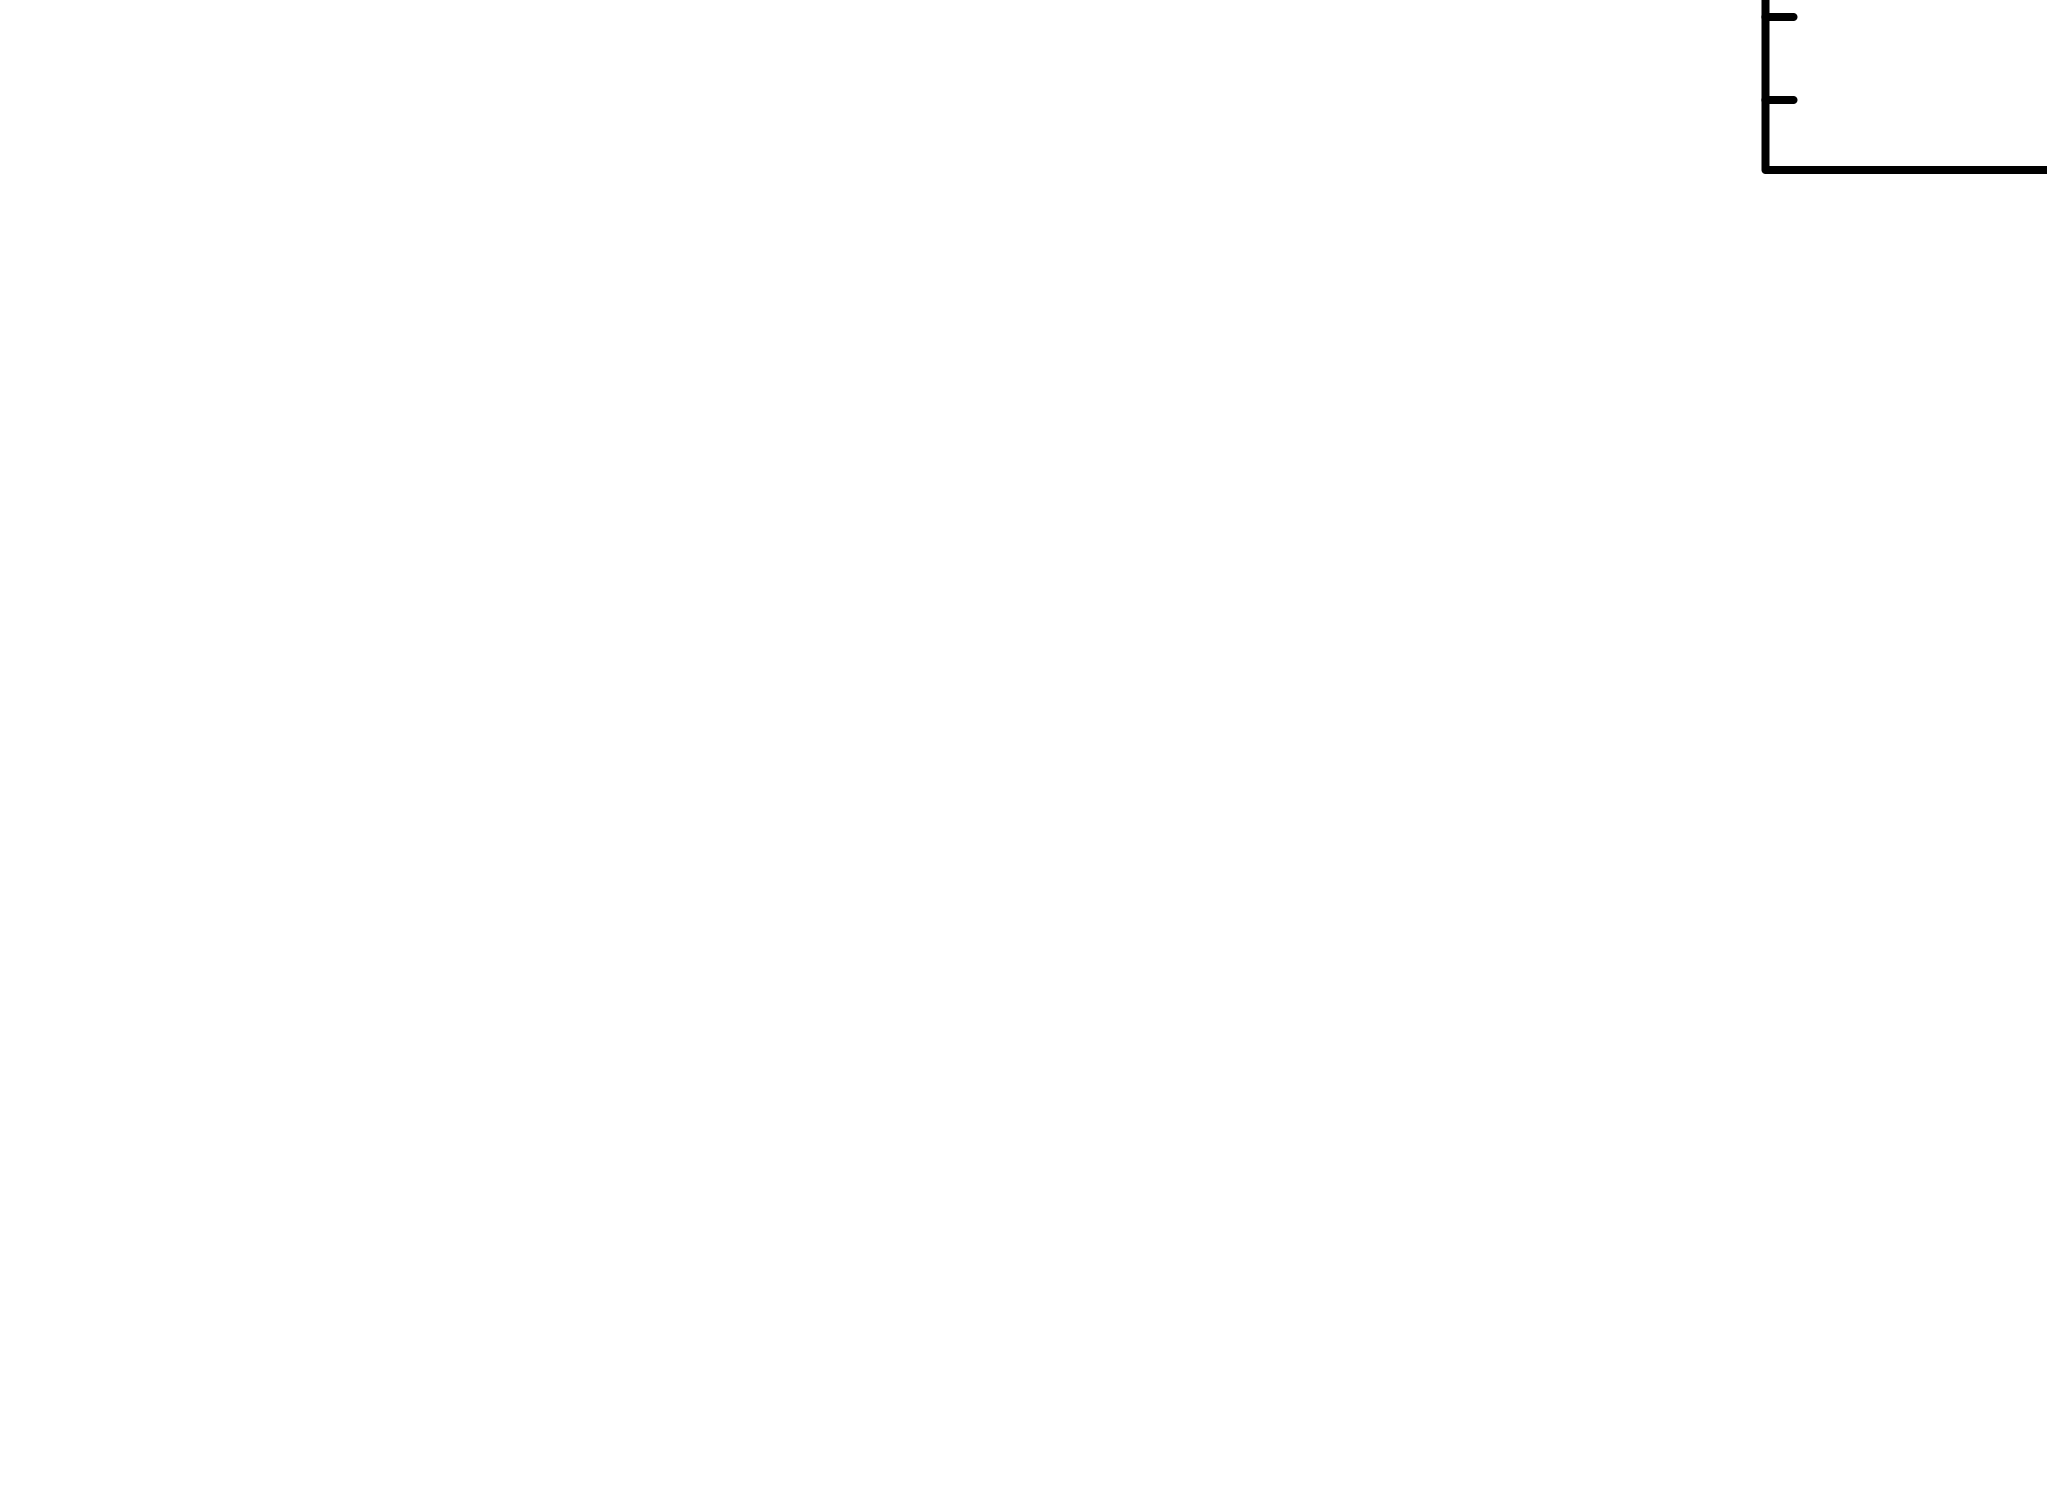

In [4]:
AllModels.clear()
mo = Model("tbabs*powerlaw")
Fit.perform()
Plot("data resid")


Model TBabs<1>*apec<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________

Reading APEC data from 3.0.9


Fit statistic  : Chi-Squared              8.365891e+09     using 20 bins.

Test statistic : Chi-Squared              8.365891e+09     using 20 bins.
 Null hypothesis probability of 0.000000e+00 with 17 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        5:norm
21.3188      11.0853      -3       1.32494       1.16177   

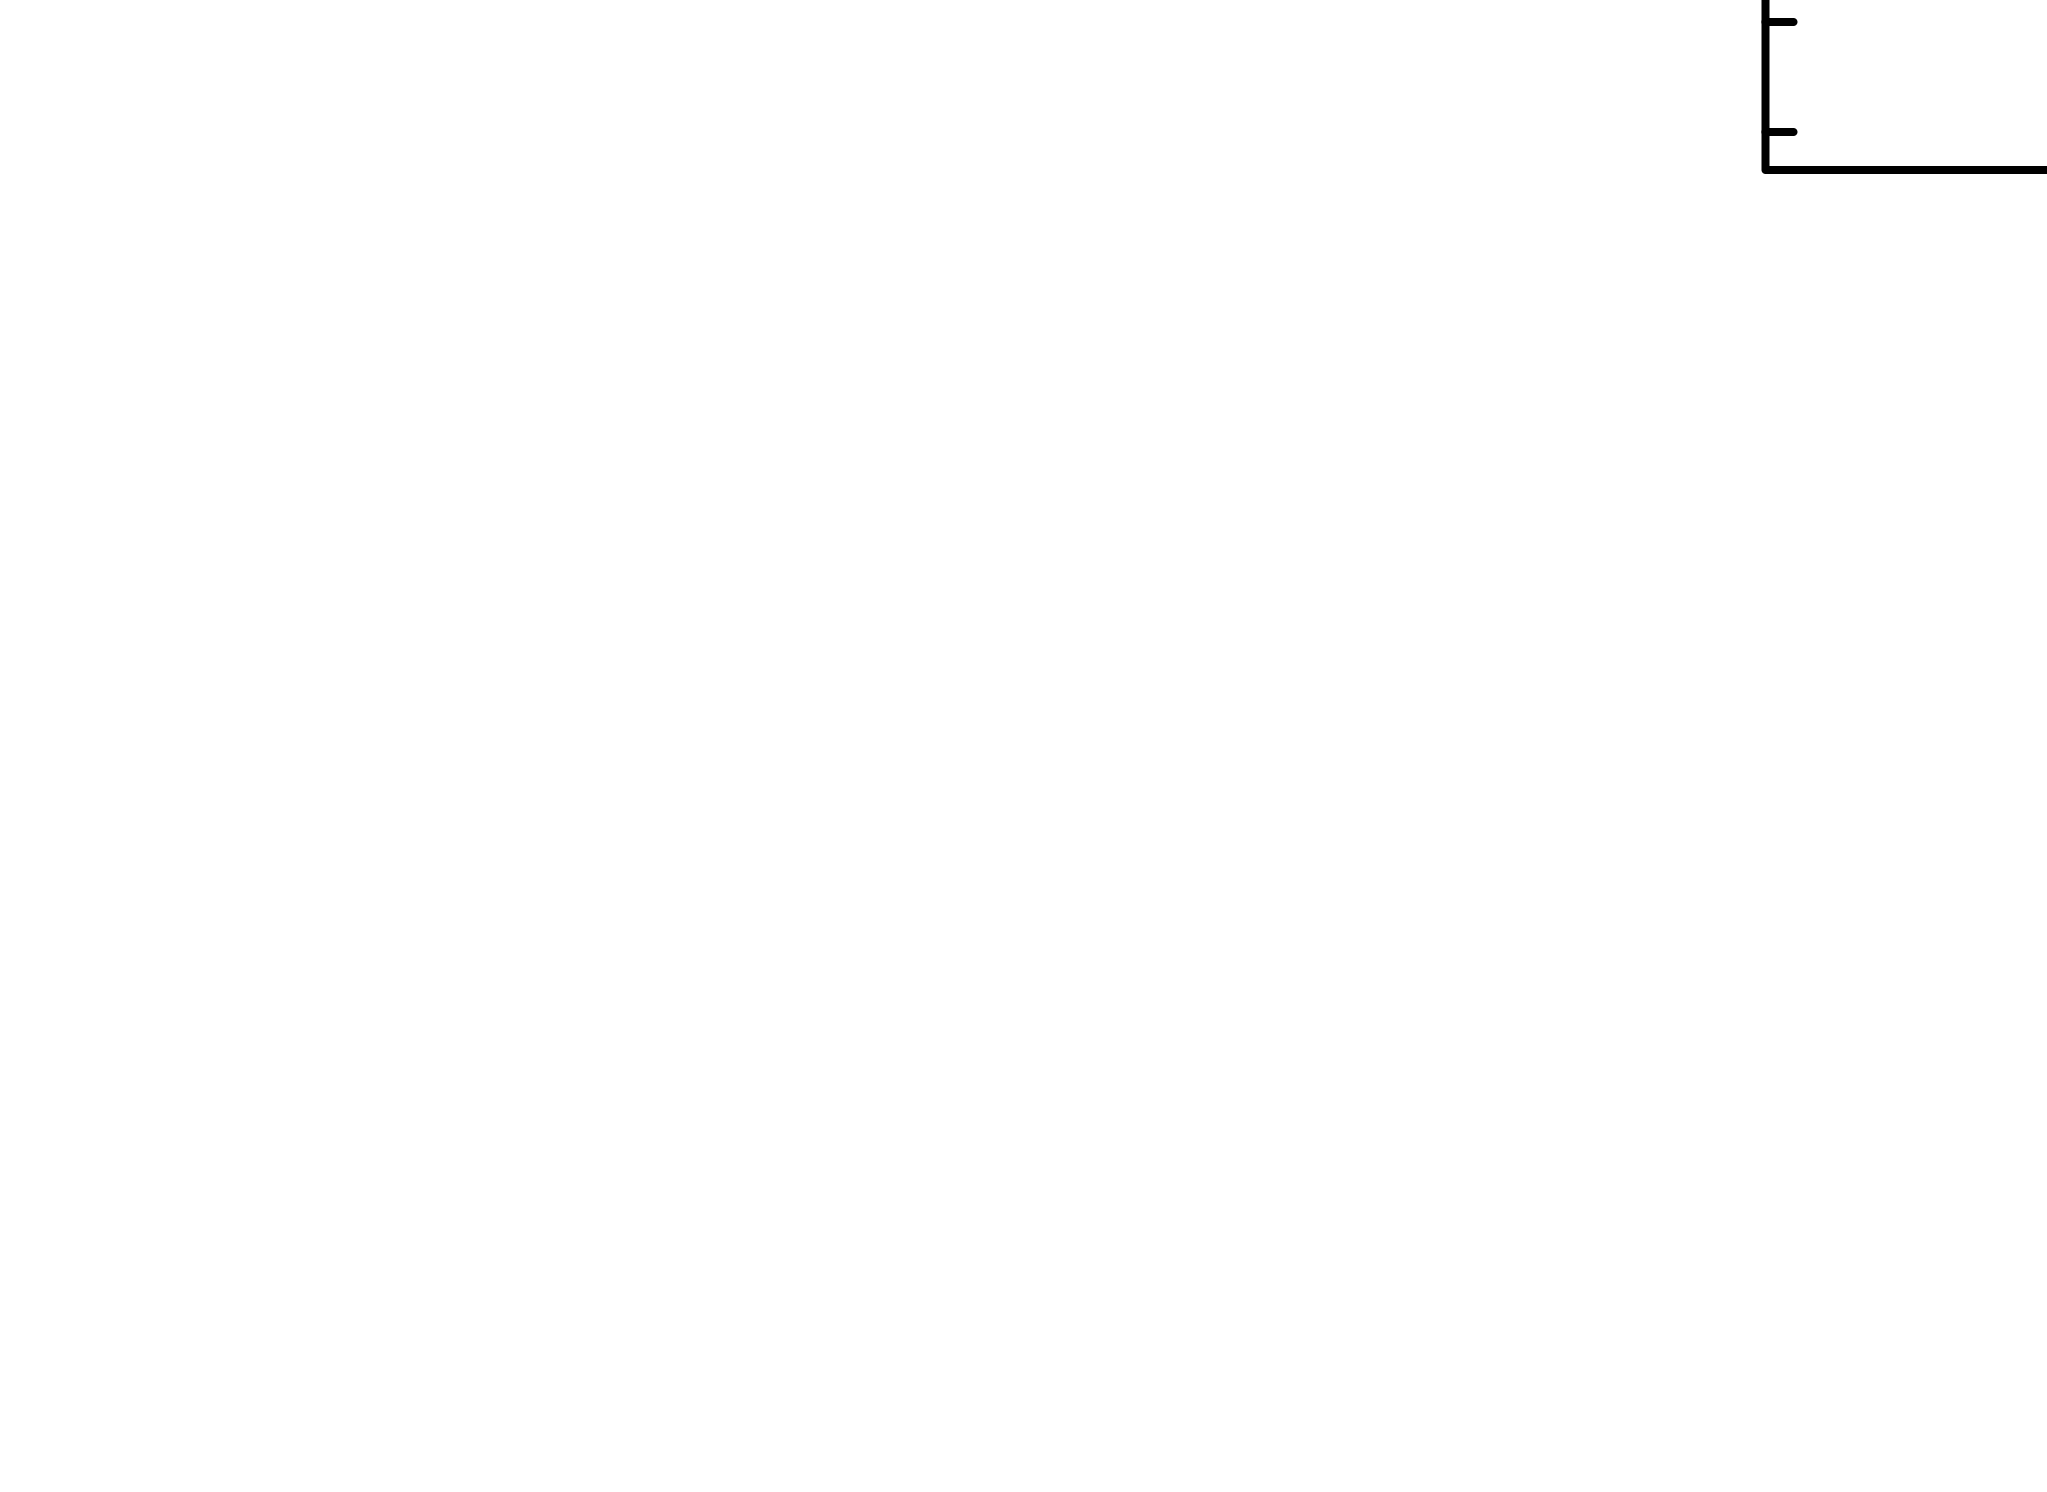

In [5]:
AllModels.clear()
mo = Model("tbabs*apec")
Fit.perform()
Plot("data resid")


Model TBabs<1>*bremss<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bremss     kT         keV      7.00000      +/-  0.0          
   3    2   bremss     norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              3.448270e+10     using 20 bins.

Test statistic : Chi-Squared              3.448270e+10     using 20 bins.
 Null hypothesis probability of 0.000000e+00 with 17 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        3:norm
20.248       4.57865       0      0.683708       4.46427   4.33516e-05
16.6395      27762.3      -1      0.399804       4.35475   3.79891e-05
16.2245      33260        -2      0.436846       4.56441   3.76956e-05


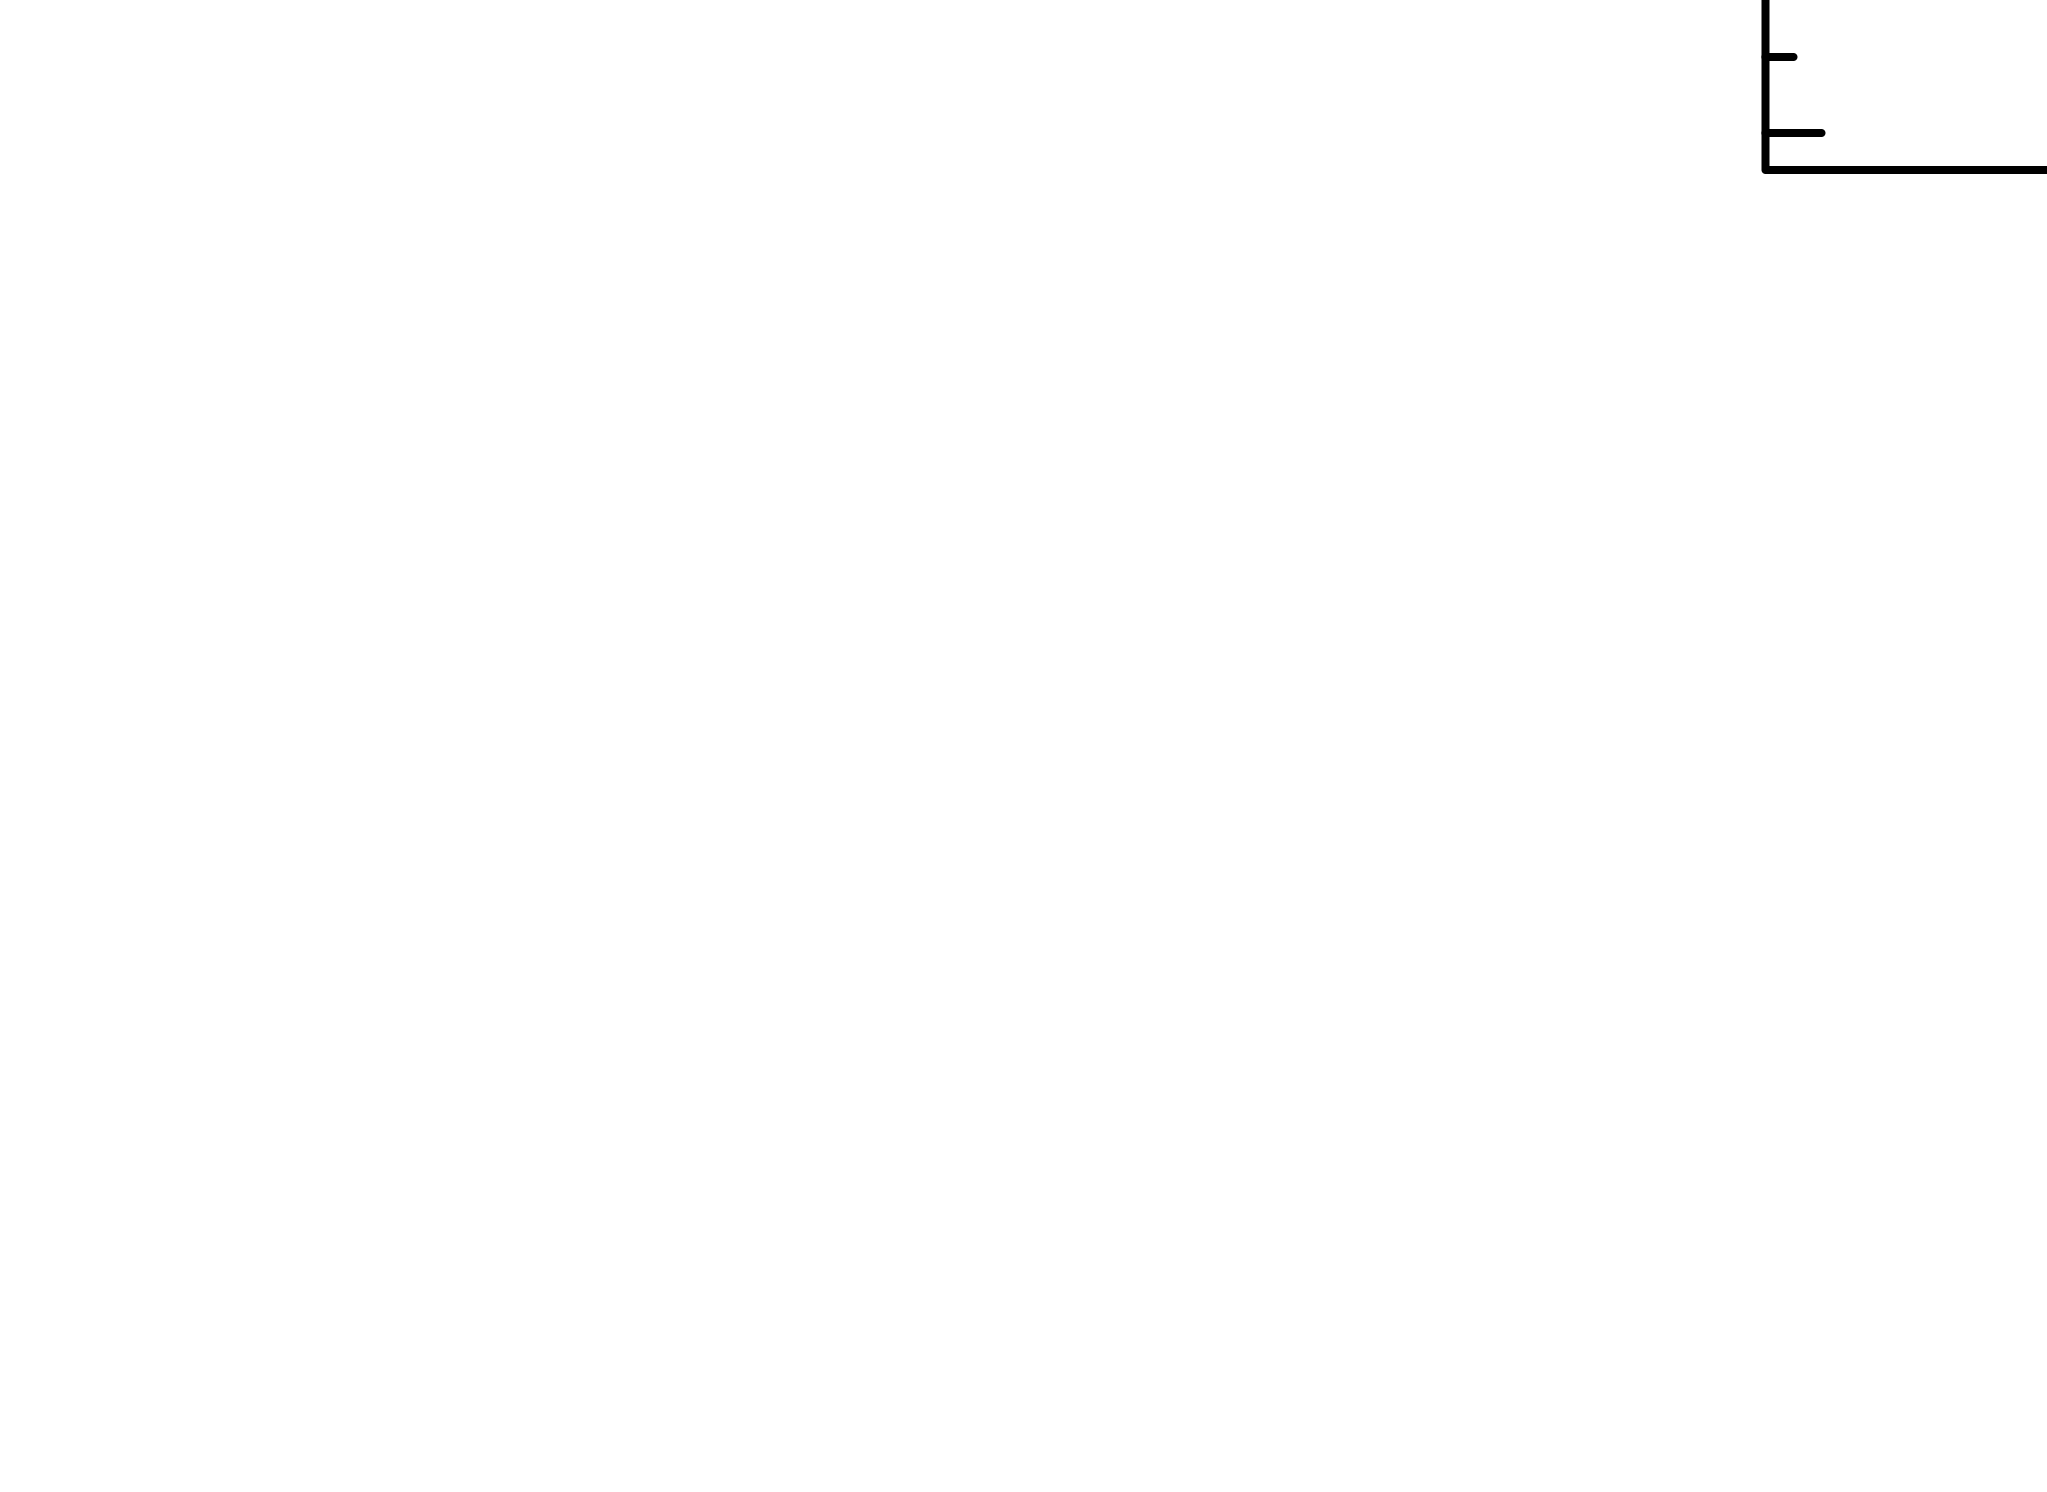

In [6]:
AllModels.clear()
mo = Model("tbabs*bremss")
Fit.perform()
Plot("data resid")

In [7]:
AllModels.calcFlux(".2 12.0")

 Model Flux 2.6552e-05 photons (1.1494e-13 ergs/cm^2/s) range (0.20000 - 12.000 keV)


In [8]:
plx = 1.5636
d_kpc = 1/plx
F_x = 1.042*10**-13

L_x = 4*3.14*F_x*(d_kpc*3.086*10**21)**2
print(L_x)

5.097977076547217e+30


In [9]:
import numpy as np
print(d_kpc)
print(np.log10(L_x))

0.6395497569710923
30.707397878298522


In [10]:
F_opt = 1.05*10**-5 * 10**(-0.4*19.99)
print('Optical Flux: ',F_opt)
print('F_x / F_opt: ', np.log10(F_x/F_opt))

Optical Flux:  1.0597155303805199e-13
F_x / F_opt:  -0.007321580106432866


In [11]:
Fit.error("2")

 Parameter   Confidence Range (2.706)
     2       1.6943      35.1767    (-2.92049,30.5619)


In [12]:
Fit.error("1")

 Parameter   Confidence Range (2.706)
     1     0.248755     0.718471    (-0.189134,0.280582)



Model TBabs<1>(bremss<2> + bremss<3>) Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bremss     kT         keV      7.00000      +/-  0.0          
   3    2   bremss     norm                1.00000      +/-  0.0          
   4    3   bremss     kT         keV      7.00000      +/-  0.0          
   5    3   bremss     norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              1.379370e+11     using 20 bins.

Test statistic : Chi-Squared              1.379370e+11     using 20 bins.
 Null hypothesis probability of 0.000000e+00 with 15 degrees of freedom
 Current data and model not fit yet.

Fit statistic  : Chi-Squared              5.203936e+10     using 20 bins.

Test statistic : Chi-Squared              5.203936e+10     using 20 bins.
 Null hypothesis 

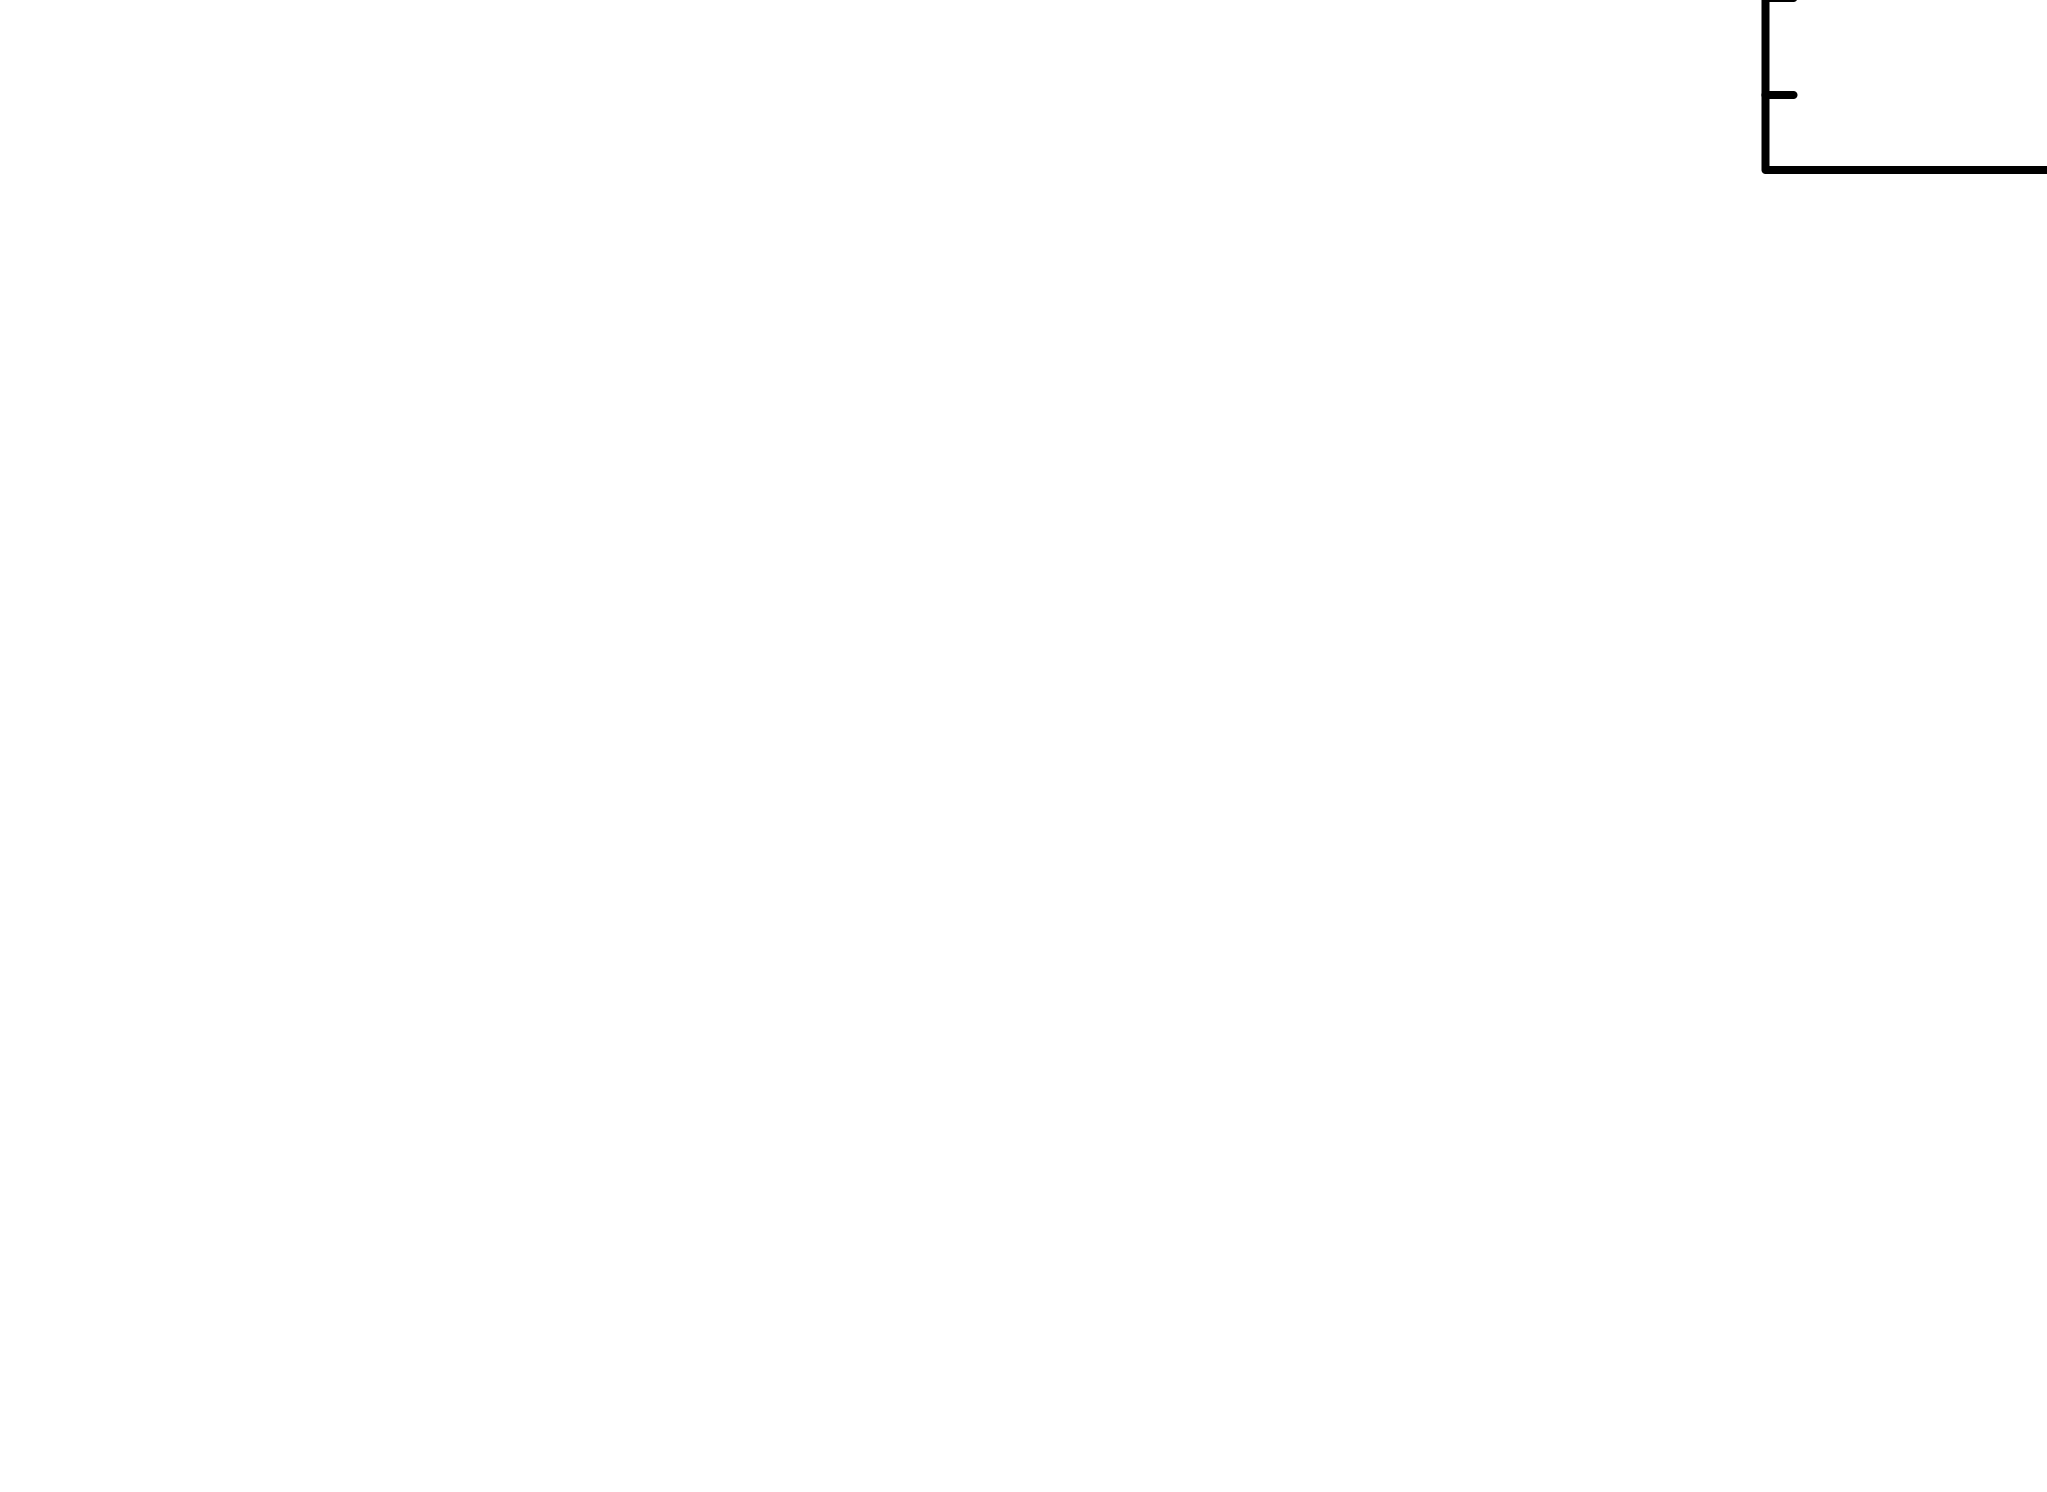

In [13]:
###### AllModels.clear()
mo = Model("tbabs*(bremss+bremss)")
mo.bremss.kT = 1.0
mo.bremss.kT = 10.0
Fit.perform()
Plot("data resid")


Model TBabs<1>(bremss<2> + gaussian<3>) Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bremss     kT         keV      7.00000      +/-  0.0          
   3    2   bremss     norm                1.00000      +/-  0.0          
   4    3   gaussian   LineE      keV      6.50000      +/-  0.0          
   5    3   gaussian   Sigma      keV      0.100000     +/-  0.0          
   6    3   gaussian   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              7.303091e+11     using 20 bins.

Test statistic : Chi-Squared              7.303091e+11     using 20 bins.
 Null hypothesis probability of 0.000000e+00 with 14 degrees of freedom
 Current data and model not fit yet.

Fit statistic  : Chi-Squared              7.458539e+11     using 20 bins.

Test statistic

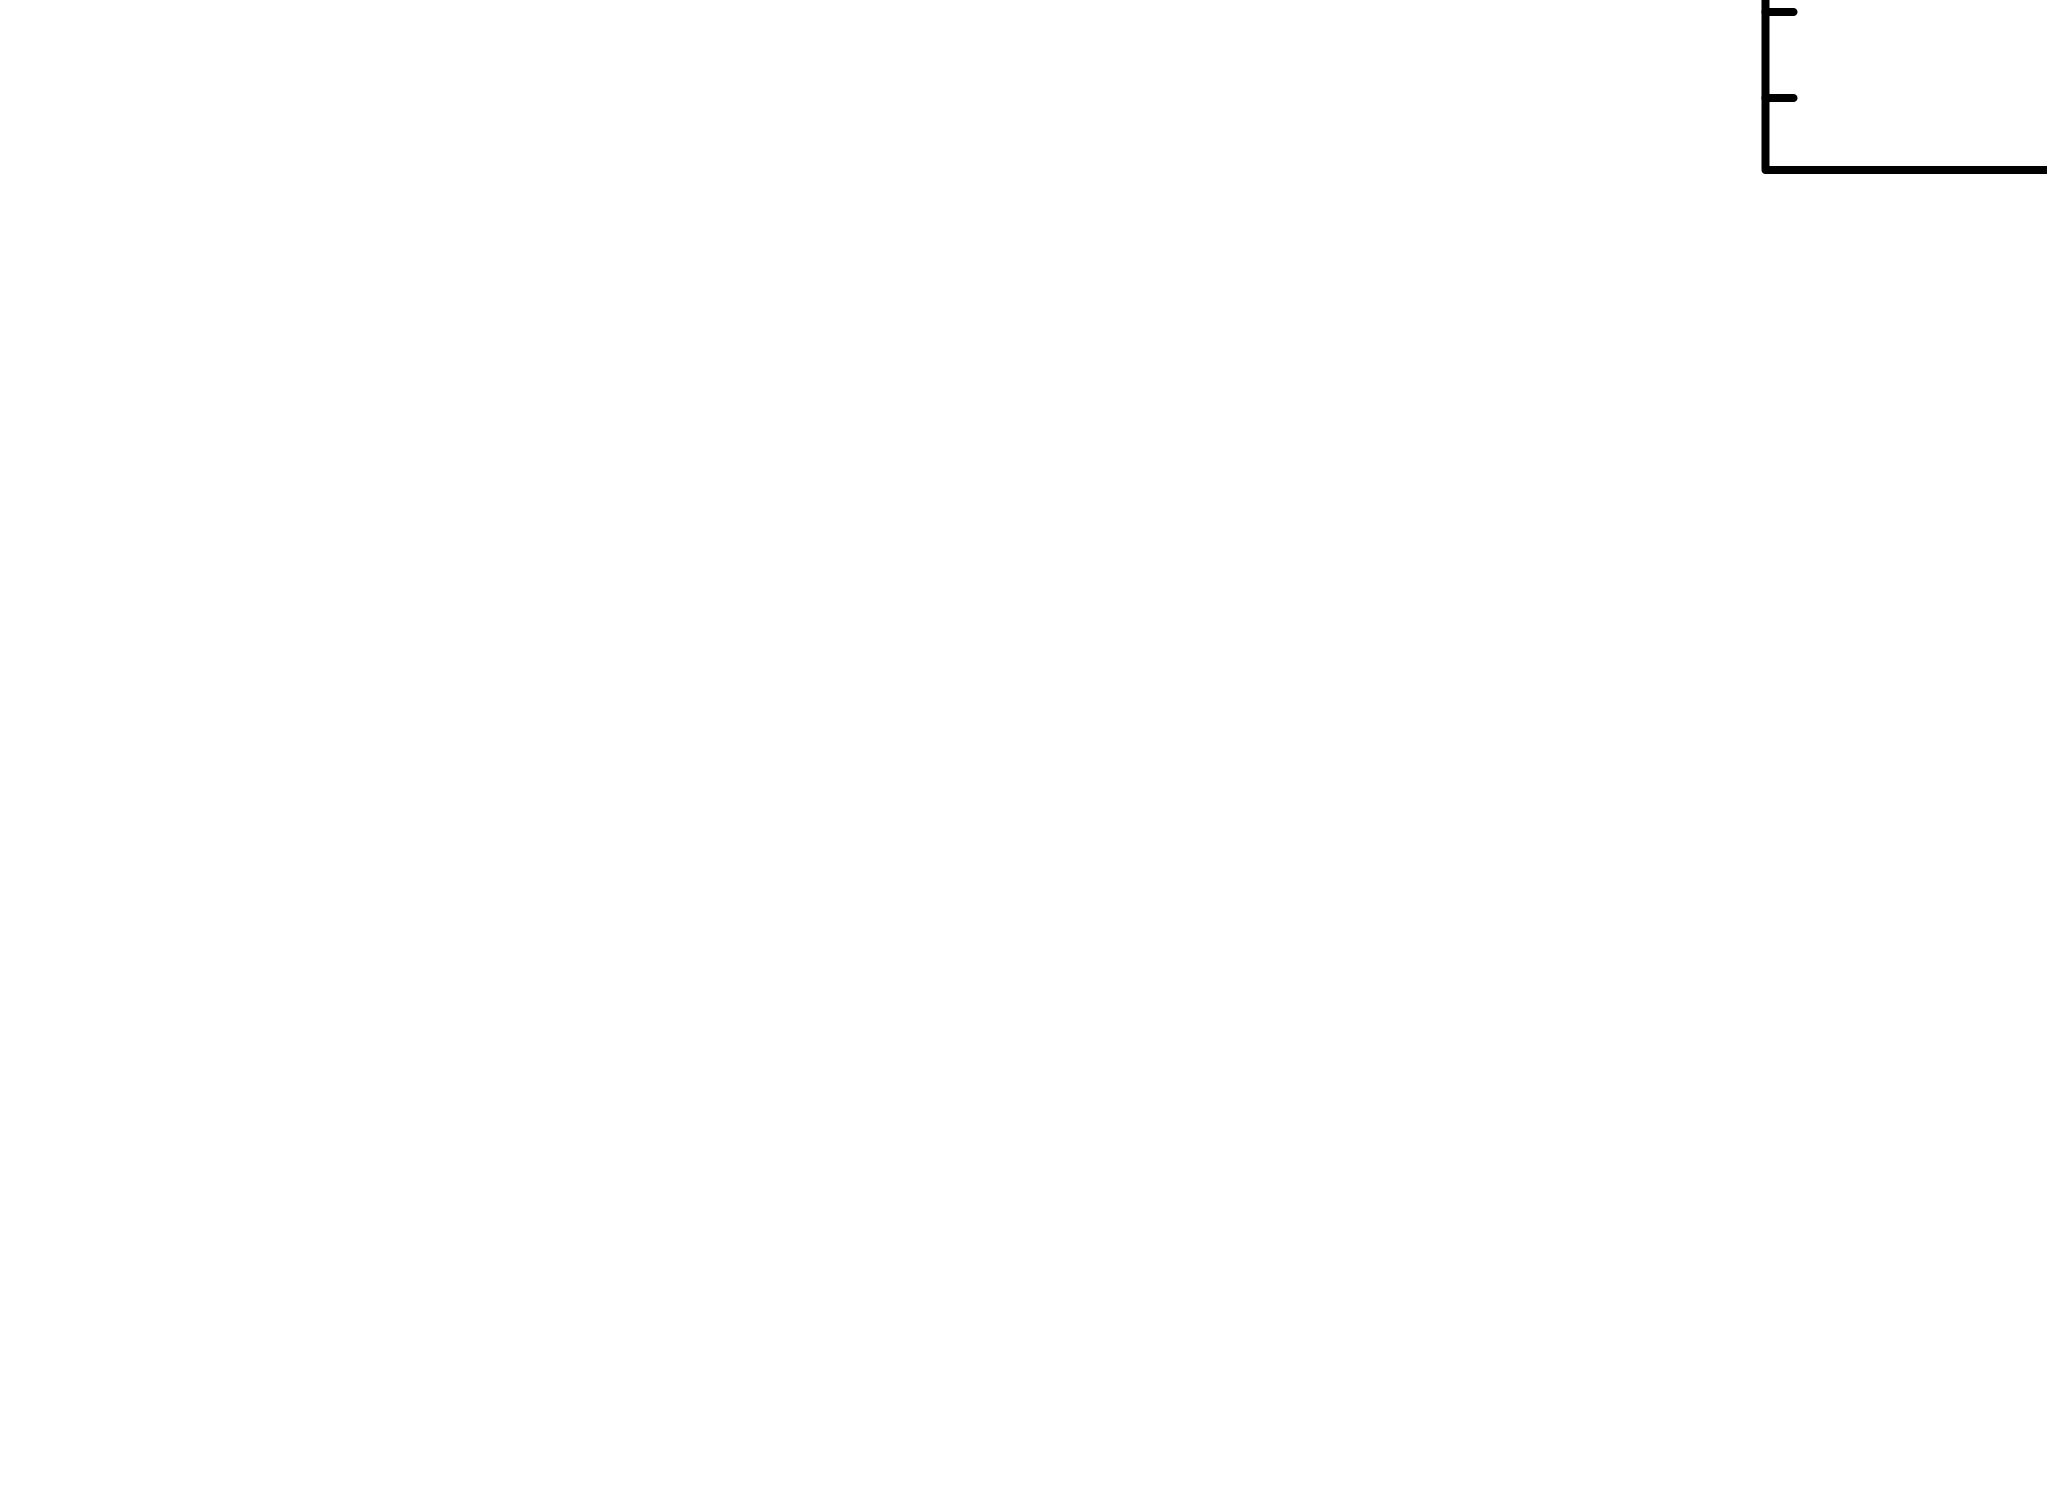

47       58.2885   4.32563e-05       19.3655   3.57962e-14
20.4431      44235.1       0      0.309734       56.0823   4.29172e-05       19.3655   1.18944e-14
20.2996      44439.6       0      0.310383       56.8452   4.26511e-05       19.3655   4.05043e-16
20.1921      39867.2       0      0.310692       57.4513   4.24150e-05       19.3655   6.10284e-17
20.1089      35794.2       0      0.310717       57.9293   4.22018e-05       19.3655   2.17435e-17
20.0449      34784.1       0      0.310472       58.2770   4.20130e-05       19.3655   5.06277e-18
19.9275      29508.5       0      0.305525       55.9107   4.13757e-05       19.3655   8.96813e-19
19.693       31157.3      -1      0.285548       33.7430   3.35440e-05       19.3655   1.14168e-05
18.2297      13692.8      -1      0.342895       10.1289   3.51932e-05       19.3655   1.16387e-06
17.1745      62246.7       0      0.361696       8.96587   3.42285e-05       19.3655   4.52214e-07
16.686       32308.8       0      0.373671       7

In [14]:
AllModels.clear()
mo = Model("tbabs*(bremss+gaussian)")
mo.gaussian.LineE = 6.4
mo.gaussian.LineE.frozen = True
Fit.perform()
Plot("data resid")


Model TBabs<1>(bremss<2> + gaussian<3>) Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bremss     kT         keV      7.00000      +/-  0.0          
   3    2   bremss     norm                1.00000      +/-  0.0          
   4    3   gaussian   LineE      keV      6.50000      +/-  0.0          
   5    3   gaussian   Sigma      keV      0.100000     +/-  0.0          
   6    3   gaussian   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              7.303091e+11     using 20 bins.

Test statistic : Chi-Squared              7.303091e+11     using 20 bins.
 Null hypothesis probability of 0.000000e+00 with 14 degrees of freedom
 Current data and model not fit yet.

Fit statistic  : Chi-Squared            

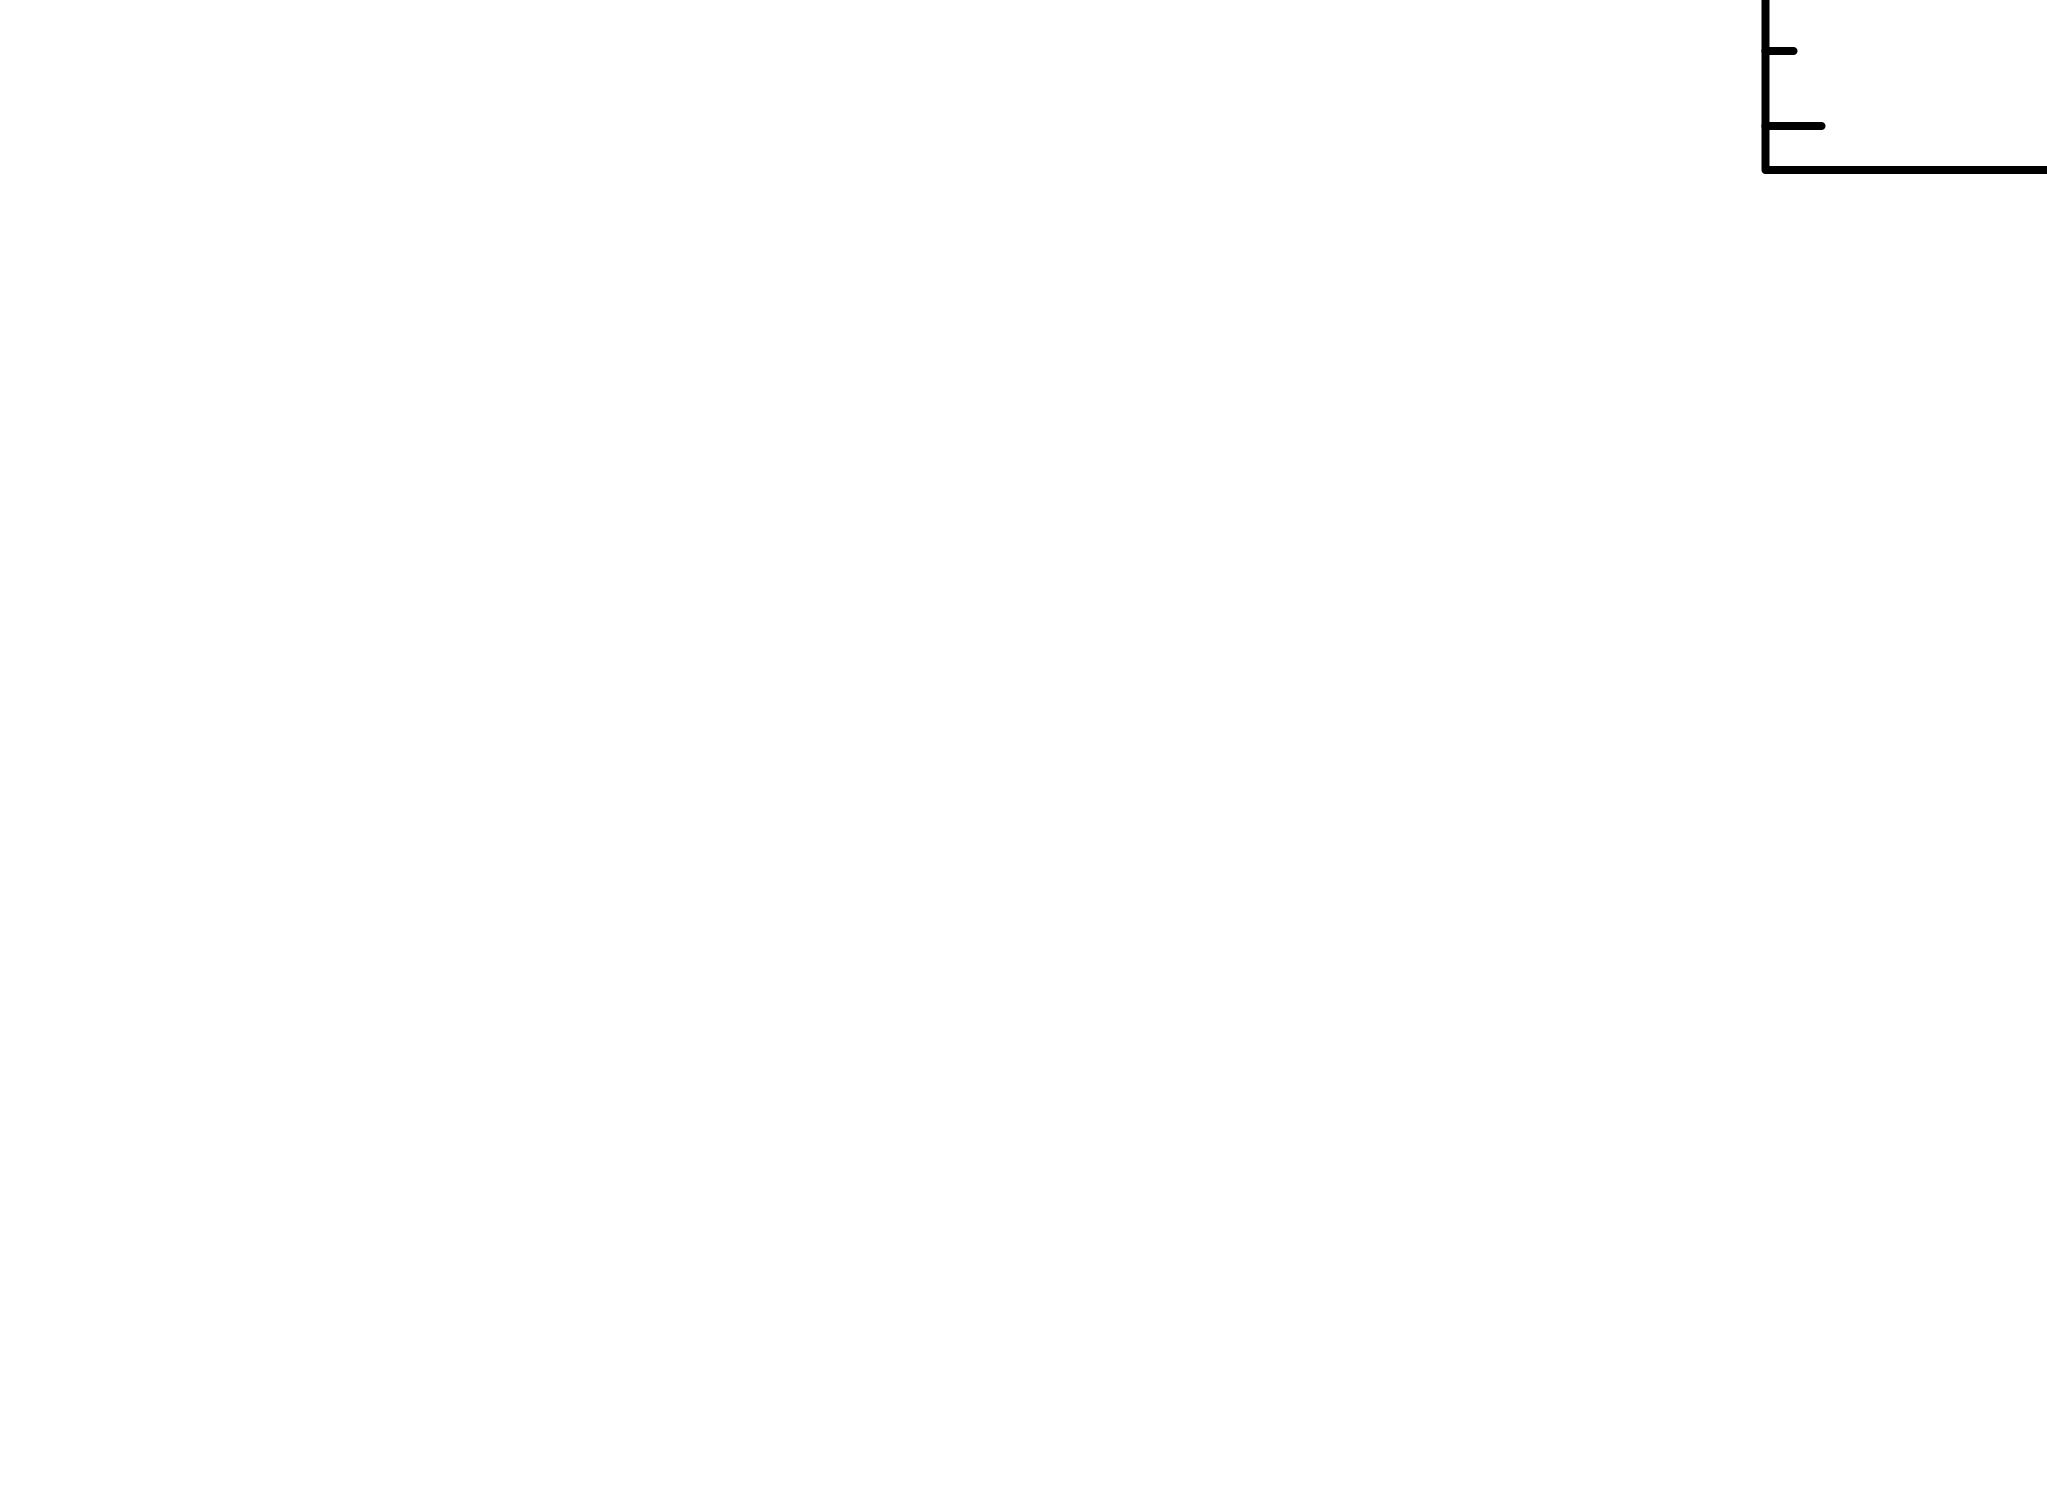

  6.342275e+11     using 20 bins.

Test statistic : Chi-Squared              6.342275e+11     using 20 bins.
 Null hypothesis probability of 0.000000e+00 with 14 degrees of freedom
 Current data and model not fit yet.

Fit statistic  : Chi-Squared              6.342275e+11     using 20 bins.

Test statistic : Chi-Squared              6.342275e+11     using 20 bins.
 Null hypothesis probability of 0.000000e+00 with 15 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        3:norm       5:Sigma        6:norm
89.0451      394928       -2      0.213371       199.089   3.90829e-06     0.0396362   1.23484e-06
73.7747      315502       -2       1.23511       65.5445   1.46689e-05     0.0129228   5.55802e-07
57.409       178744       -3      0.527616       199.225   9.81285e-05    0.00524315   1.68065e-07
47.3068      439309       -4      0.299666       86.3419   1.79287e-05   0.000437

In [15]:
AllModels.clear()
mo = Model("tbabs*(bremss+gaussian)")
mo.gaussian.LineE = 6.7
mo.gaussian.LineE.frozen = True
Fit.perform()
Plot("data resid")